zomato data analysis project

step-1 Importing Libraries

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

step-2 Create the data frame

In [29]:
df = pd.read_csv('zomato data .csv')
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


step-3 convert the data type of column 'rate'

In [30]:
def handlerate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handlerate)

In [31]:
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Type of restaurant

In [33]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


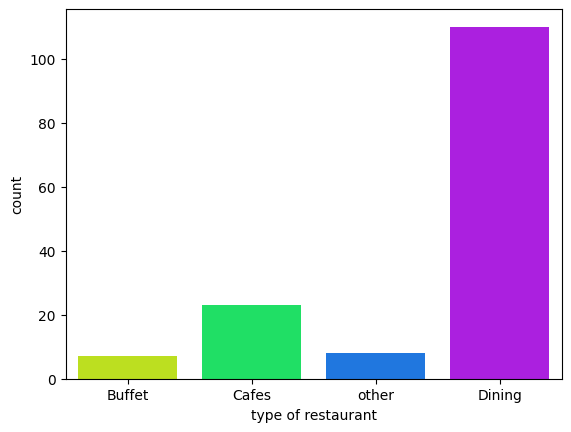

In [41]:
type_data = df['listed_in(type)']
palette = sns.color_palette("hsv", len(type_data.unique()))
sns.countplot(x=type_data, hue=type_data, palette=palette, dodge=False, legend=False)
plt.xlabel('type of restaurant')
plt.show()

conclusion- majority of the restaurant falls in dinning category





maximum vote count for restaurant

In [35]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'votes')

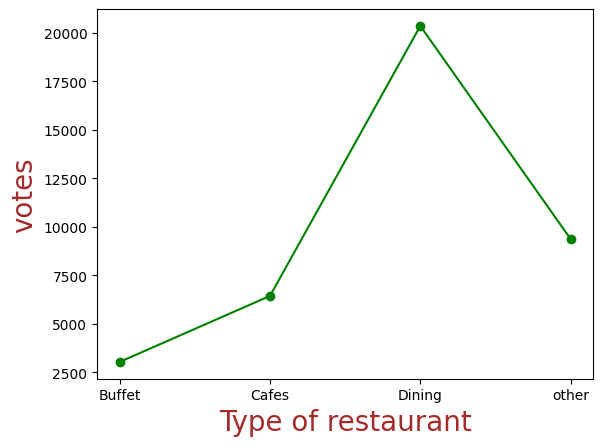

In [36]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='green',marker = 'o')
plt.xlabel('Type of restaurant',c = 'brown',size = 20)
plt.ylabel('votes',c = 'brown',size=20)

conclusion - dinning restauran has recieved maximum votes

average rating recieved by restaurants

In [37]:
df.sample()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
124,Kwality Wall's Swirl's Happiness Station,No,No,2.9,25,200,Dining


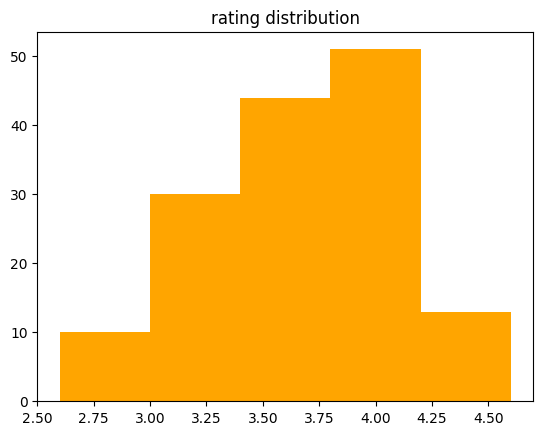

In [38]:
plt.hist(df['rate'],bins = 5,color='orange')
plt.title('rating distribution')
plt.show()

conclusion - the majority restaurants recieved rating of 3.5 to 4

Average order spending by couples

In [39]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


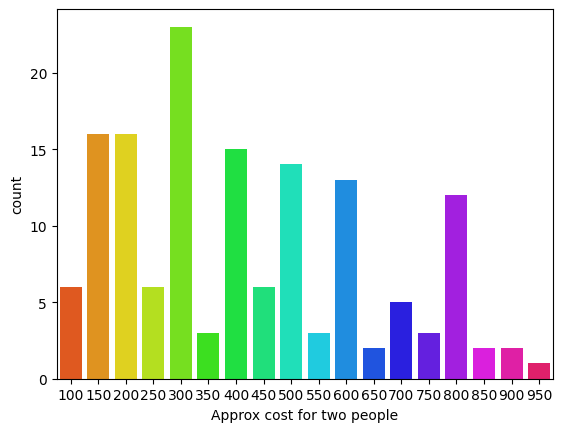

In [42]:
couple_data = df['approx_cost(for two people)']
palette = sns.color_palette("hsv", len(couple_data.unique()))
sns.countplot(x=couple_data, hue=couple_data, palette=palette, dodge=False, legend=False)
plt.xlabel('Approx cost for two people')
plt.show()

conclusion - the majority of couple prefer restaurants with an approx cost of 300 rupees

which mode recieve max rating

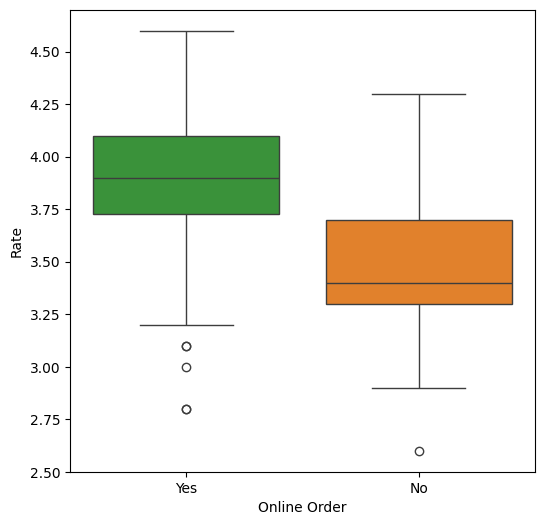

In [47]:
plt.figure(figsize=(6, 6))
palette = {"Yes": "#2ca02c", "No": "#ff7f0e"}  # Bright green and bright orange
sns.boxplot(x='online_order', y='rate', data=df, hue='online_order', palette=palette, dodge=False)
plt.legend([], [], frameon=False)  # Disable the legend
plt.xlabel('Online Order')
plt.ylabel('Rate')
plt.show()

conclusion - offline order recieved lower rating in comparison to online order

In [48]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


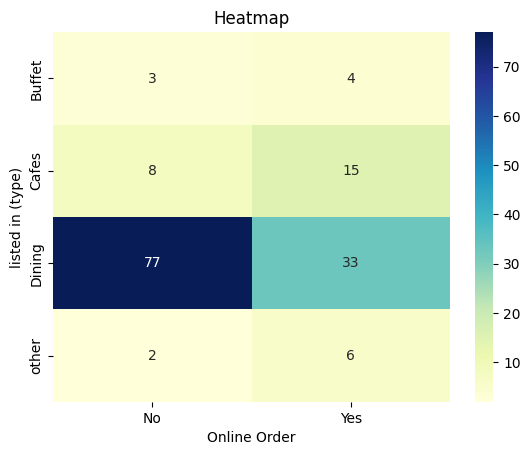

In [51]:
pivot_table = df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True, cmap = 'YlGnBu',fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('listed in (type)')
plt.show()

conclusion - Dinning restaurants primarily  accept offline orders,whereas cafes primarily recieve online orders. This siggests that clients preferred to place orders in person at restaurants but prefer online ordering at cafes